In [ ]:
import pandas as pd

data = pd.read_csv("xu3_dataset.csv") 
data_blackscholes = pd.read_csv("xu3_blackscholes.csv")
data_bodytrack = pd.read_csv("xu3_bodytrack.csv")
data.head()

,total_watts,w_big,w_little,w_gpu,w_mem,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,3.065,0.474810,0.033012,0.096321,0.048800,0.0,0.0,0.0,0.0,49,53,52,48,47,1000000000
1,2.706,0.235620,0.032095,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
2,2.706,0.235620,0.034846,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
3,2.637,0.234685,0.034846,0.096321,0.037758,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000
4,2.637,0.233750,0.033929,0.096321,0.032886,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000


In [ ]:
train_X = data[['temp4','temp5','temp6','temp7']]
train_X = train_X.drop([len(train_X)-1])    #drop last row since there is nothing to predict
temp4_Y = data[['temp4']]
temp5_Y = data[['temp5']]
temp6_Y = data[['temp6']]
temp7_Y = data[['temp7']]
#drop first temperature value since it cannot be predicted
temp4_Y = temp4_Y.drop(0)
temp5_Y = temp5_Y.drop(0)
temp6_Y = temp6_Y.drop(0)
temp7_Y = temp7_Y.drop(0)

In [ ]:
from sklearn.neural_network import MLPRegressor
#Four regressors for each core
model_1 = MLPRegressor(hidden_layer_sizes = (100, 60, 30), activation = 'relu', random_state = 0)
model_2 = MLPRegressor(hidden_layer_sizes = (100, 60, 30), activation = 'relu', random_state = 0)
model_3 = MLPRegressor(hidden_layer_sizes = (100, 60, 30), activation = 'relu', random_state = 0)
model_4 = MLPRegressor(hidden_layer_sizes = (100, 60, 30), activation = 'relu', random_state = 0)
model_1.fit(train_X,temp4_Y)
model_2.fit(train_X,temp5_Y)
model_3.fit(train_X,temp6_Y)
model_4.fit(train_X,temp7_Y)



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 60, 30), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=0, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

data_blackscholes.head()
test_blackscholes_X = data_blackscholes[['temp4','temp5','temp6','temp7']]
test_bodytrack_X = data_bodytrack[['temp4','temp5','temp6','temp7']]

In [ ]:
from sklearn.metrics import mean_squared_error
blk_tmp4 = data_blackscholes[["temp4"]]
blk_tmp4 = blk_tmp4.drop(0)
blk_tmp5 = data_blackscholes[["temp5"]]
blk_tmp5 = blk_tmp5.drop(0)
blk_tmp6 = data_blackscholes[["temp6"]]
blk_tmp6 = blk_tmp6.drop(0)
blk_tmp7 = data_blackscholes[["temp7"]]
blk_tmp7 = blk_tmp7.drop(0)

bdy_tmp4 = data_bodytrack[["temp4"]]
bdy_tmp4 = bdy_tmp4.drop(0)
bdy_tmp5 = data_bodytrack[["temp5"]]
bdy_tmp5 = bdy_tmp5.drop(0)
bdy_tmp6 = data_bodytrack[["temp6"]]
bdy_tmp6 = bdy_tmp6.drop(0)
bdy_tmp7 = data_bodytrack[["temp7"]]
bdy_tmp7 = bdy_tmp7.drop(0)

test_bodytrack_X = test_bodytrack_X.drop([len(test_bodytrack_X)-1])
test_blackscholes_X = test_blackscholes_X.drop([len(test_blackscholes_X)-1])

blk4_pred = model_1.predict(test_blackscholes_X)
blk5_pred = model_2.predict(test_blackscholes_X)
blk6_pred = model_3.predict(test_blackscholes_X)
blk7_pred = model_4.predict(test_blackscholes_X)

bdy4_pred = model_1.predict(test_bodytrack_X)
bdy5_pred = model_2.predict(test_bodytrack_X)
bdy6_pred = model_3.predict(test_bodytrack_X)
bdy7_pred = model_4.predict(test_bodytrack_X)

blk4_mse = mean_squared_error(blk_tmp4,blk4_pred)
blk5_mse = mean_squared_error(blk_tmp5,blk5_pred)
blk6_mse = mean_squared_error(blk_tmp6,blk6_pred)
blk7_mse = mean_squared_error(blk_tmp7,blk7_pred)

bdy4_mse = mean_squared_error(bdy_tmp4,bdy4_pred)
bdy5_mse = mean_squared_error(bdy_tmp5,bdy5_pred)
bdy6_mse = mean_squared_error(bdy_tmp6,bdy6_pred)
bdy7_mse = mean_squared_error(bdy_tmp7,bdy7_pred)

print(blk4_mse,blk5_mse,blk6_mse,blk7_mse)
print(bdy4_mse,bdy5_mse,bdy6_mse,bdy7_mse)



0.15376662457196266 0.3220482476119574 0.1896223303756489 0.11576752903213844
1.4208547649285856 1.4014931166414046 1.408207076135013 0.7359544787345029


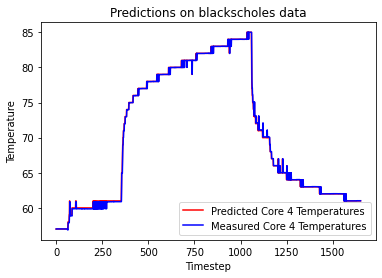

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(blk_tmp4)),blk_tmp4,'r',label='Predicted Core 4 Temperatures')
plt.plot(np.arange(len(blk4_pred)),blk4_pred,'b',label = 'Measured Core 4 Temperatures')
plt.title("Predictions on blackscholes data")
plt.xlabel('Timestep')
plt.ylabel('Temperature')
plt.legend()
plt.show()

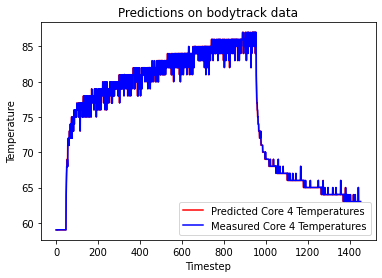

In [ ]:
plt.plot(np.arange(len(bdy_tmp4)),bdy_tmp4,'r',label='Predicted Core 4 Temperatures')
plt.plot(np.arange(len(bdy4_pred)),bdy4_pred,'b',label = 'Measured Core 4 Temperatures')
plt.title("Predictions on bodytrack data")
plt.xlabel('Timestep')
plt.ylabel('Temperature')
plt.legend()
plt.show()